In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
countries_observed = ["China",
                      "Italy",
                      "US", 
                      "Brazil", 
                      "Austria", 
                      "Spain",
                      "France",
                      "Portugal",
                     ]

## Temporal Series - Daily Cases (new and accumulated)

In [3]:
df_cases = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_cases.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_cases = df_cases.groupby(['Country/Region']).sum()
df_cases = df_cases.transpose()
df_cases.index.name = 'date'
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0


In [4]:
df_daily_cases = df_cases.sub(df_cases.shift())
df_daily_cases.iloc[0] = df_cases.iloc[0]
df_daily_cases.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-05-28,580.0,26.0,140.0,0.0,3.0,0.0,769.0,442.0,15.0,37.0,...,1889.0,8.0,75.0,80.0,0.0,12.0,0.0,22.0,0.0,17.0
2020-05-29,623.0,23.0,137.0,1.0,7.0,0.0,717.0,460.0,19.0,27.0,...,2099.0,5.0,24.0,45.0,1.0,0.0,0.0,5.0,0.0,0.0
2020-05-30,866.0,23.0,133.0,0.0,3.0,0.0,795.0,251.0,8.0,30.0,...,1612.0,5.0,78.0,89.0,0.0,1.0,0.0,27.0,0.0,25.0
2020-05-31,680.0,15.0,127.0,0.0,2.0,1.0,637.0,355.0,10.0,46.0,...,1937.0,2.0,77.0,51.0,0.0,1.0,0.0,13.0,0.0,4.0
2020-06-01,545.0,6.0,119.0,1.0,0.0,0.0,564.0,210.0,19.0,2.0,...,1580.0,2.0,79.0,152.0,0.0,1.0,0.0,31.0,32.0,25.0


### New Cases (moving average, 3 days)

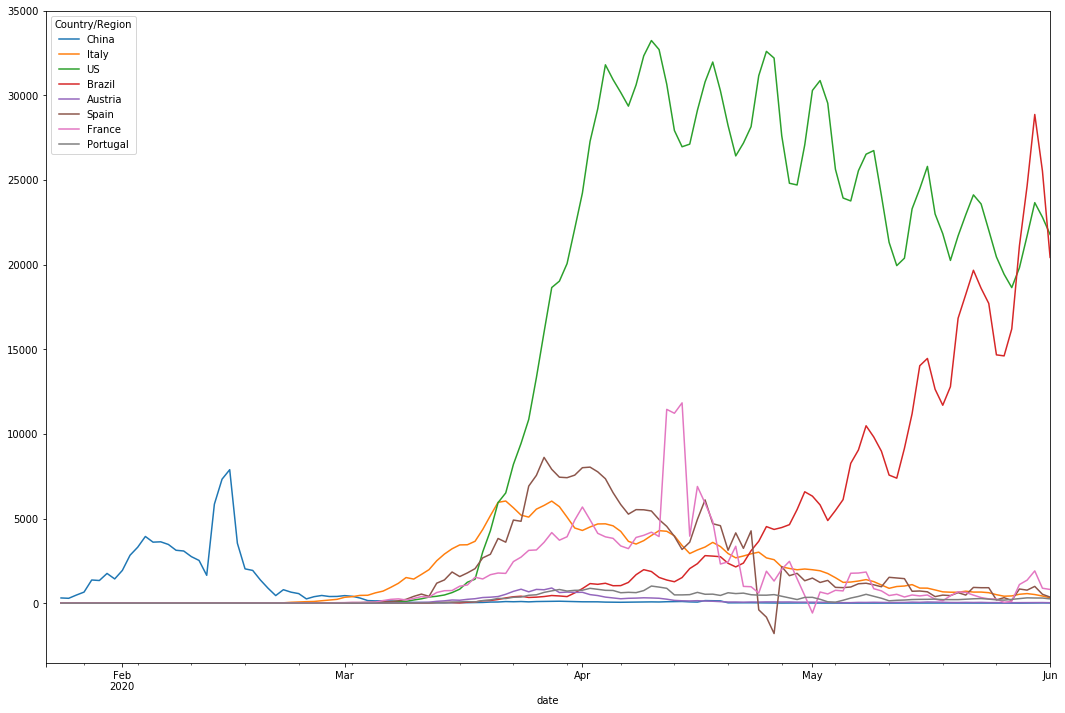

In [5]:
df_daily_cases[countries_observed].rolling(window=3).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Cases (log)

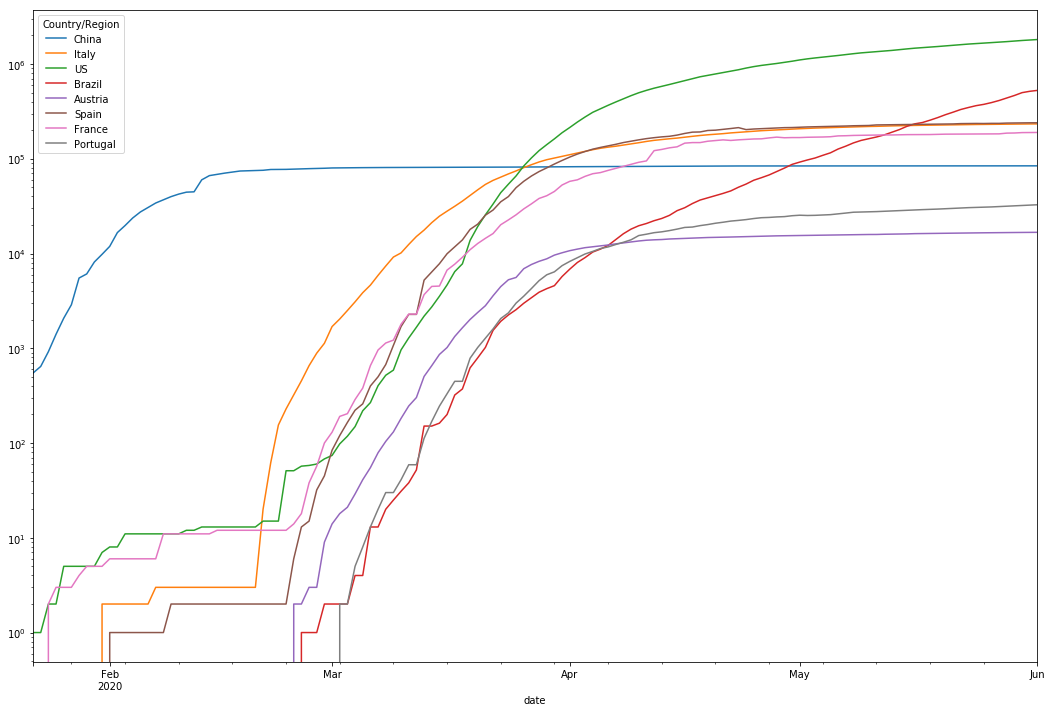

In [6]:
df_cases[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Deaths (new and accumulated)

In [7]:
df_deaths = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_deaths.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_deaths = df_deaths.groupby(['Country/Region']).sum()
df_deaths = df_deaths.transpose()
df_deaths.index.name = 'date'
df_deaths.index = pd.to_datetime(df_deaths.index)
df_deaths.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_daily_deaths = df_deaths.sub(df_deaths.shift())
df_daily_deaths.iloc[0] = df_deaths.iloc[0]
df_daily_deaths.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-05-28,8.0,0.0,7.0,0.0,0.0,0.0,8.0,15.0,0.0,23.0,...,377.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
2020-05-29,11.0,0.0,8.0,0.0,0.0,0.0,12.0,7.0,0.0,0.0,...,324.0,0.0,0.0,3.0,0.0,0.0,0.0,8.0,0.0,0.0
2020-05-30,3.0,0.0,8.0,0.0,0.0,0.0,8.0,7.0,0.0,0.0,...,215.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0
2020-05-31,8.0,0.0,7.0,0.0,0.0,0.0,11.0,4.0,0.0,0.0,...,113.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2020-06-01,8.0,0.0,8.0,0.0,0.0,0.0,17.0,8.0,-1.0,0.0,...,556.0,1.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


### New Deaths (moving average, 3 days)

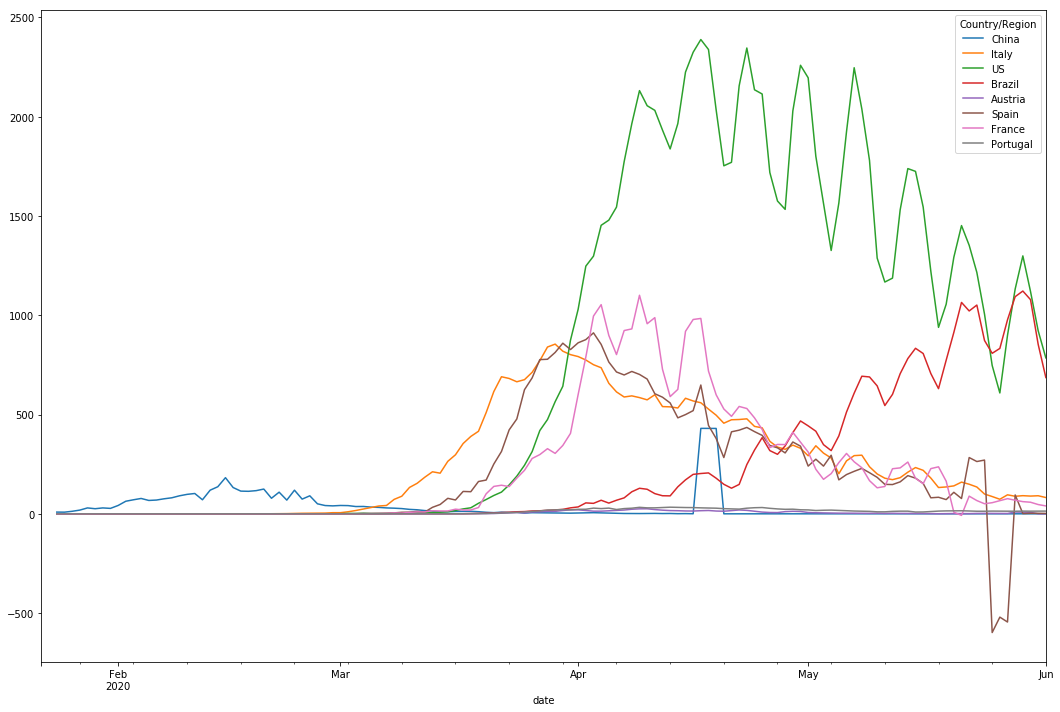

In [9]:
df_daily_deaths[countries_observed].rolling(window=3).mean().plot(figsize=(18,12))


plt.show()

### Cumulative Deaths (log)

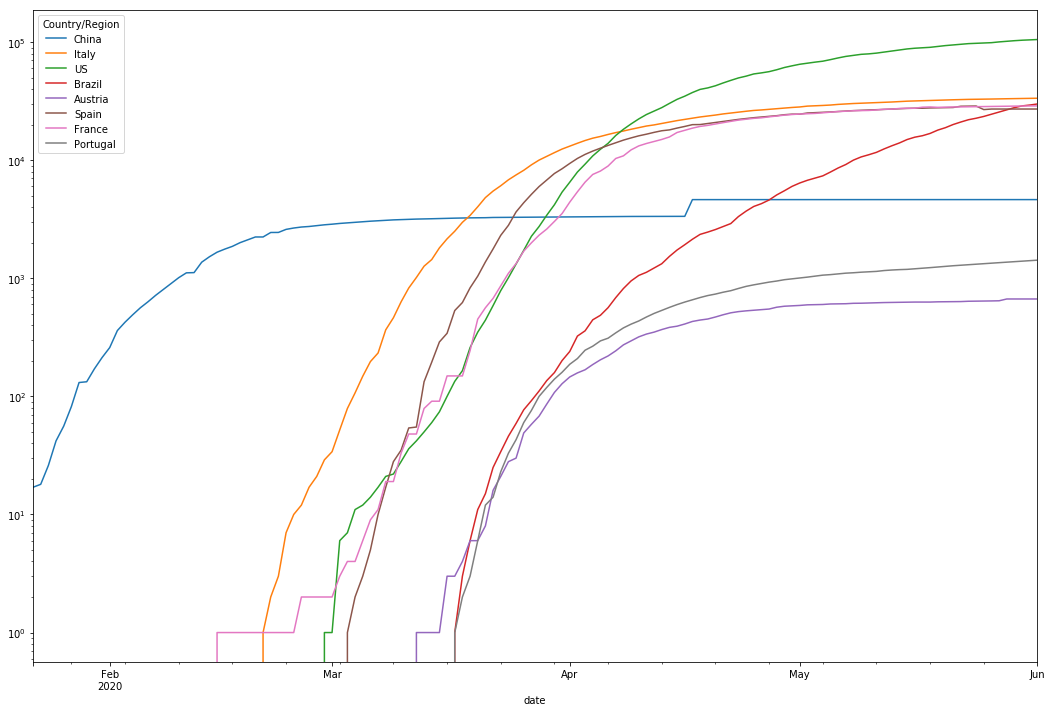

In [10]:
df_deaths[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered (new and accumulated)

In [11]:
df_recovered = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_recovered.drop(["Lat", "Long", "Province/State"], axis=1, inplace=True)
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.transpose()
df_recovered.index.name = 'date'
df_recovered.index = pd.to_datetime(df_recovered.index)

# fixing error in the original series
df_recovered.loc["2020-03-17","Austria"] = 8 
df_recovered.loc["2020-02-23","Italy"] = 1

df_recovered.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_daily_recovered = df_recovered.sub(df_recovered.shift())
df_daily_recovered.iloc[0] = df_recovered.iloc[0]
df_daily_recovered.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-05-28,71.0,11.0,148.0,5.0,0.0,0.0,268.0,32.0,-3.0,58.0,...,1.0,4.0,26.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0
2020-05-29,50.0,28.0,145.0,3.0,0.0,0.0,171.0,10.0,29.0,61.0,...,5.0,26.0,34.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-05-30,44.0,6.0,127.0,8.0,0.0,0.0,0.0,20.0,9.0,173.0,...,15.0,2.0,55.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
2020-05-31,25.0,15.0,199.0,2.0,0.0,0.0,548.0,69.0,4.0,73.0,...,3.0,3.0,54.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0
2020-06-01,100.0,5.0,146.0,4.0,0.0,0.0,185.0,16.0,8.0,3.0,...,31.0,4.0,22.0,0.0,14.0,0.0,0.0,0.0,133.0,0.0


### New Recovered (moving average, 3 days)

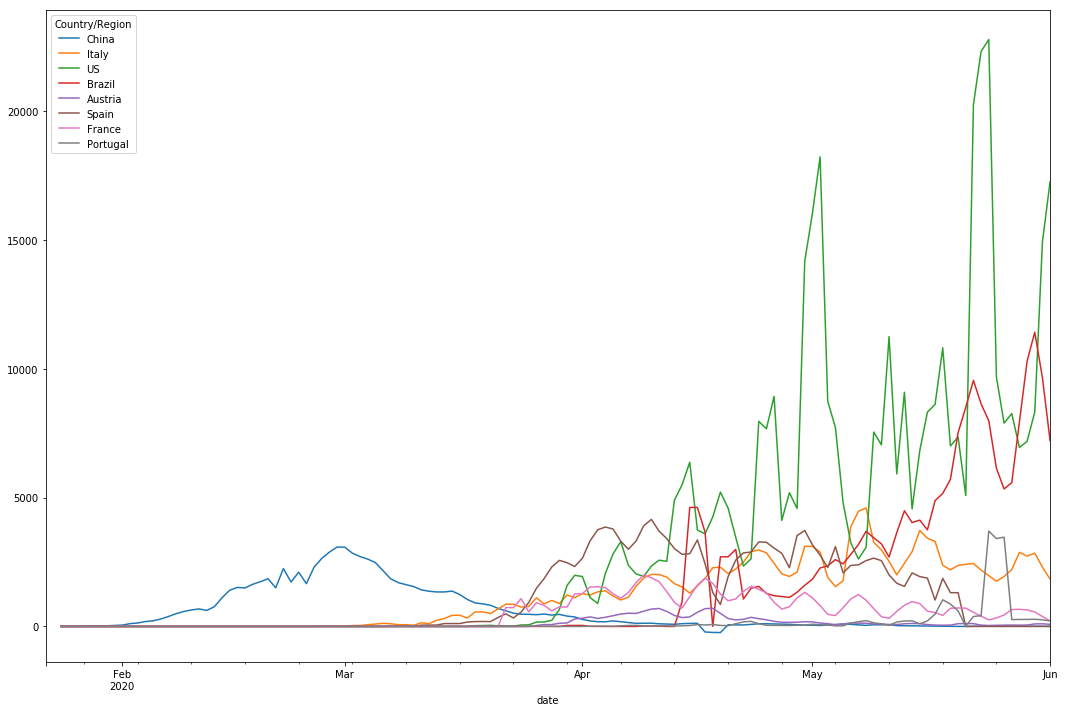

In [13]:
df_daily_recovered[countries_observed].rolling(window=3).mean().plot(figsize=(18,12))
plt.show()

### Cumulative Recovered (log)

In [14]:
df_recovered.loc["2020-02-23","Italy"] = 1

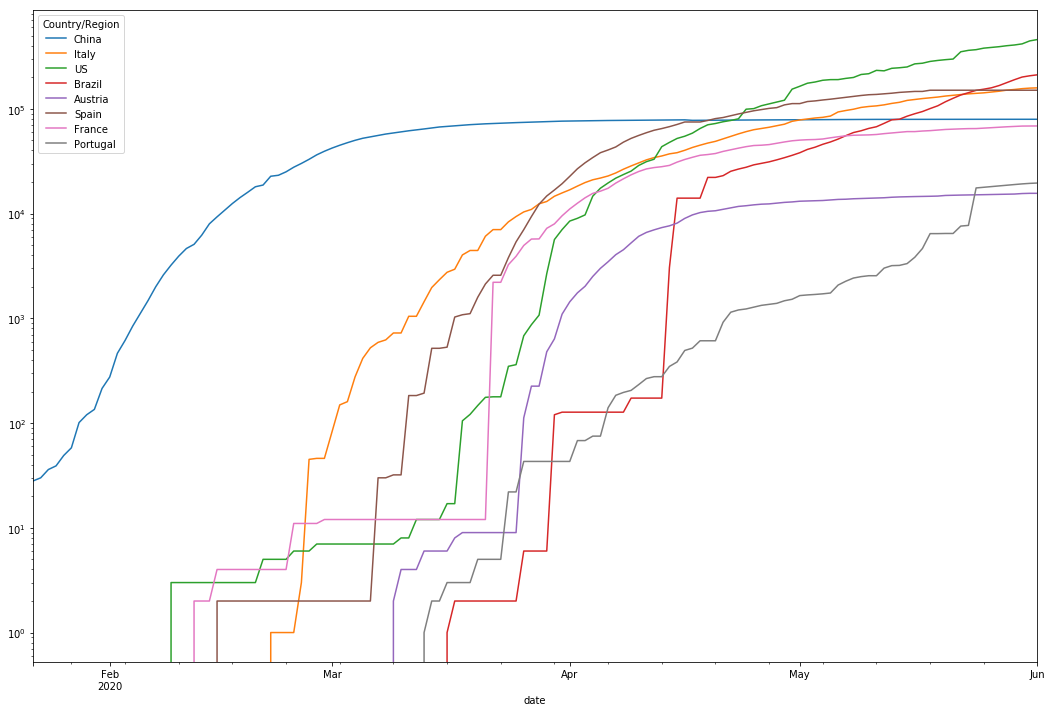

In [15]:
df_recovered[countries_observed].plot(figsize=(18,12), logy=True)
plt.show()

### Retrieving population data to explore COVID-19 data per inhabitant

In [16]:
## https://towardsdatascience.com/web-scraping-html-tables-with-python-c9baba21059

#import requests
#import lxml.html as lh
#url = 'https://www.worldometers.info/world-population/population-by-country/'

In [17]:
##Create a handle, page, to handle the contents of the website
#page = requests.get(url) #Store the contents of the website under doc
#doc = lh.fromstring(page.content) #Parse data that are stored between <tr>..</tr> of HTML

In [18]:
##Check the length of the first 12 rows
#tr_elements = doc.xpath('//tr')
#[len(T) for T in tr_elements[:12]]

In [19]:
#tr_elements = doc.xpath('//tr') #Create empty list
#col = []
#i = 0 #For each row, store each first element (header) and an empty list
#for t in tr_elements[0]:
#    i += 1
#    name = t.text_content()
#    print('%d:"%s"'%(i,name))
#    col.append((name,[]))

In [20]:
##Since out first row is the header, data is stored on the second row onwards
#for j in range(1,len(tr_elements)):
#    #T is our j'th row
#    T = tr_elements[j]
#    #If row is not of same size, the //tr data is not from our table 
#    if len(T) != len(tr_elements[0]):
#        break
#    
#    #i is the index of our column
#    i = 0
#    
#    #Iterate through each element of the row
#    for t in T.iterchildren():
#        data = t.text_content() 
#        #Check if row is empty
#        if i > 0:
#        #Convert any numerical value to integers
#            try:
#                data = int(data)
#            except:
#                pass
#        #Append the data to the empty list of the i'th column
#        col[i][1].append(data)
#        #Increment i for the next column
#        i += 1

In [21]:
##Check the length of the columns
#[len(C) for (title,C) in col]

In [22]:
#wp_dict = {title:column for (title,column) in col}
#df_wp = pd.DataFrame(wp_dict)
#df_wp["Population (2020)"] = df_wp["Population (2020)"].str.replace(',', '').astype(float)

In [23]:
#with open("./df_wp.pkl", "wb") as f:
#    pickle.dump(df_wp, f)

In [24]:
with open("./df_wp.pkl", "rb") as f:
    df_wp = pickle.load(f)

In [25]:
df_wp.head()

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1.439324e+09,0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,1.380004e+09,0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,3.310027e+08,0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,2.735236e+08,1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,2.208923e+08,2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [26]:
df_wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #                        235 non-null    object 
 1   Country (or dependency)  235 non-null    object 
 2   Population (2020)        234 non-null    float64
 3   Yearly Change            235 non-null    object 
 4   Net Change               235 non-null    object 
 5   Density (P/Km²)          235 non-null    object 
 6   Land Area (Km²)          235 non-null    object 
 7   Migrants (net)           235 non-null    object 
 8   Fert. Rate               235 non-null    object 
 9   Med. Age                 235 non-null    object 
 10  Urban Pop %              235 non-null    object 
 11  World Share              235 non-null    object 
dtypes: float64(1), object(11)
memory usage: 22.2+ KB


In [27]:
# Aligninig names of countries (e.g US and United States)
df_wp.loc[2, 'Country (or dependency)'] = 'US'
cop = df_wp.loc[df_wp["Country (or dependency)"].isin(countries_observed)][["Country (or dependency)",
                                                                                                "Population (2020)"]]
cop

,Country (or dependency),Population (2020)
0,China,1.439324e+09
2,US,3.310027e+08
5,Brazil,2.125594e+08
21,France,6.527351e+07
22,Italy,6.046183e+07
29,Spain,4.675478e+07
88,Portugal,1.019671e+07
96,Austria,9.006398e+06


In [28]:
pops = []
for country in countries_observed:
    p = cop[cop['Country (or dependency)'] == country]['Population (2020)'].values[0]
    pops.append(p)

## Temporal Series - Cumulative Cases per Population

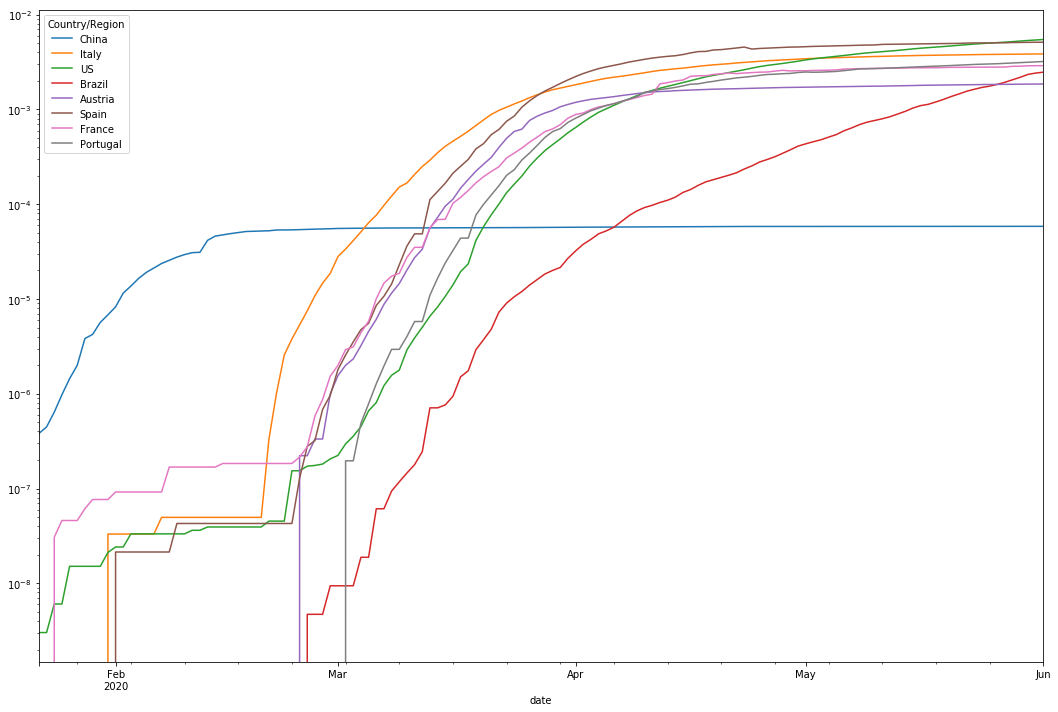

In [29]:
df_cases[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Cumulative Deaths per Population

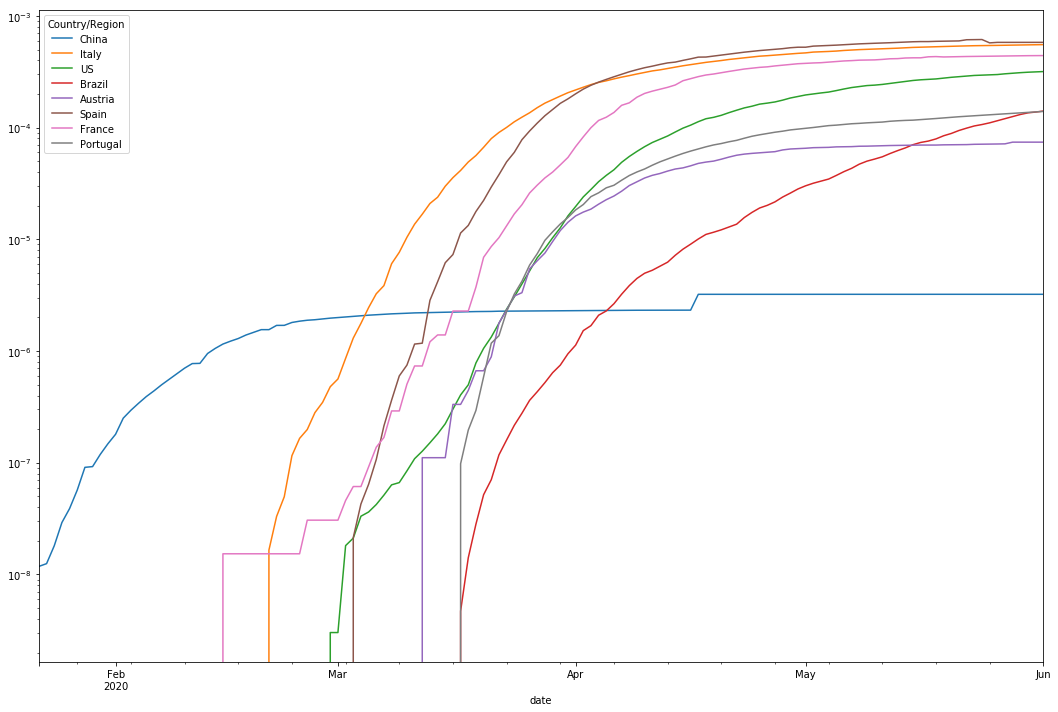

In [30]:
df_deaths[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()

## Temporal Series - Daily Recovered per Population

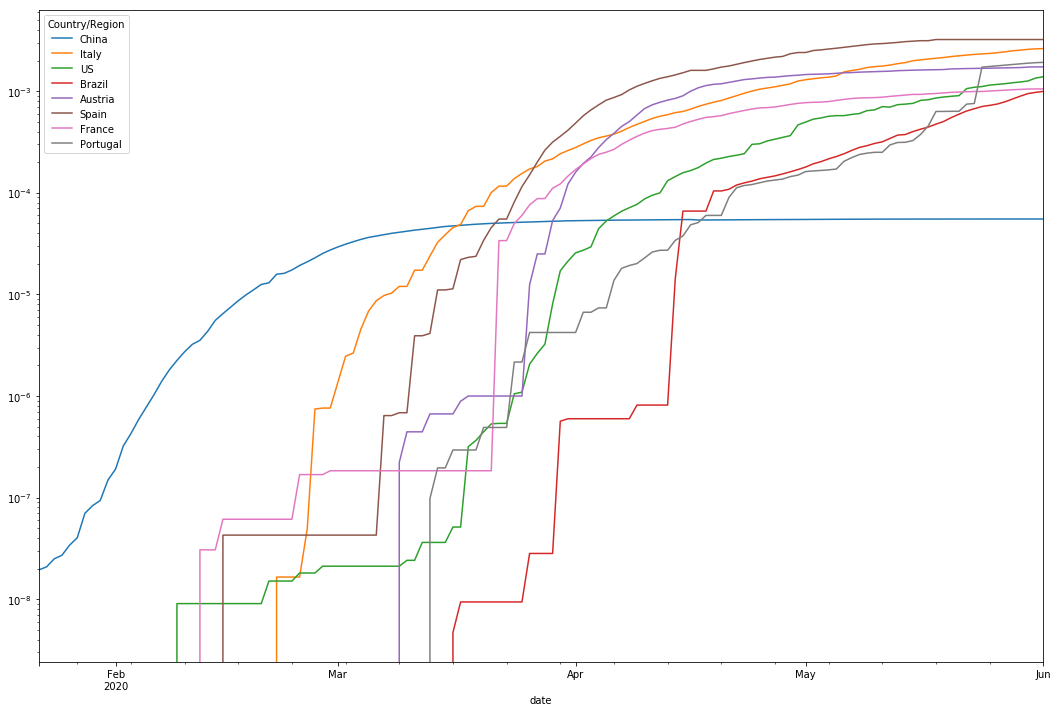

In [31]:
df_recovered[countries_observed].div(pops, axis='columns').plot(figsize=(18,12), logy=True)
plt.show()